In [74]:
# two-truths phenomena
# using Python, GraSPy


import graspy
import matplotlib.pyplot as plt
import numpy as np

from graspy.simulations import sbm
from graspy.embed import AdjacencySpectralEmbed, LaplacianSpectralEmbed
from graspy.plot import heatmap, pairplot
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

%matplotlib inline

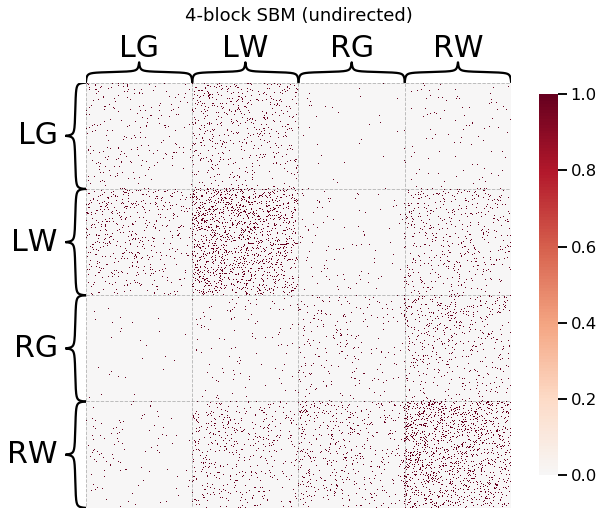

In [75]:
# SBM simulation
# use the p in fig.3 in "On a two-truths phenomenon in spectral graph clustering"
np.random.seed(1)
n_verts = 200
labels_sbm = n_verts * ["LG"] + n_verts * ["LW"] + n_verts * ["RG"] + n_verts * ["RW"]
P = np.array([[0.020, 0.044, 0.002, 0.009],
              [0.044, 0.115, 0.010, 0.042],
              [0.002, 0.010, 0.020, 0.045],
              [0.009, 0.042, 0.045, 0.117]])
undirected_sbm = sbm(4 * [n_verts], P)
#visualize the sbm graph
heatmap(undirected_sbm, title='4-block SBM (undirected)', inner_hier_labels=labels_sbm)

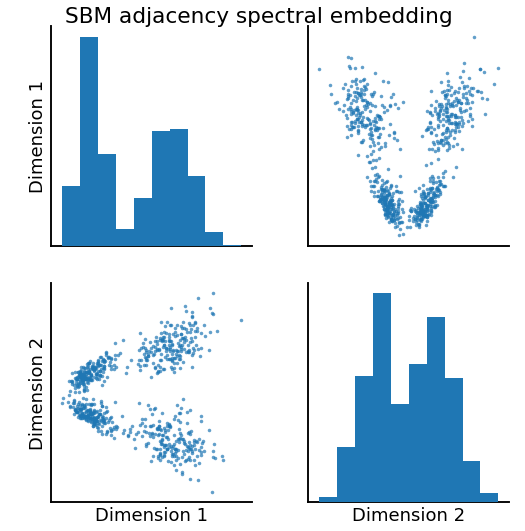

In [79]:
# ASE
ase = AdjacencySpectralEmbed()
ase_Xhat = ase.fit_transform(undirected_sbm)
pairplot(ase_Xhat, title='SBM adjacency spectral embedding', height=4)

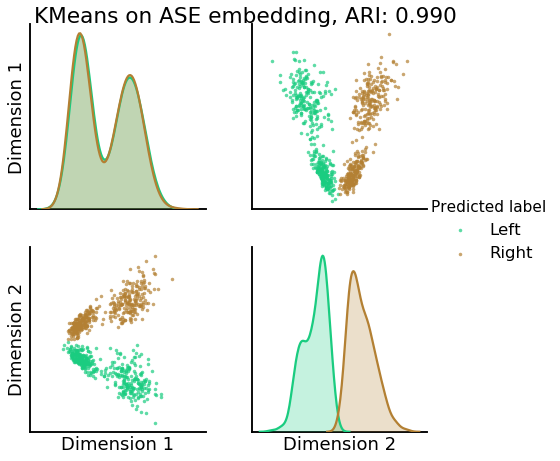

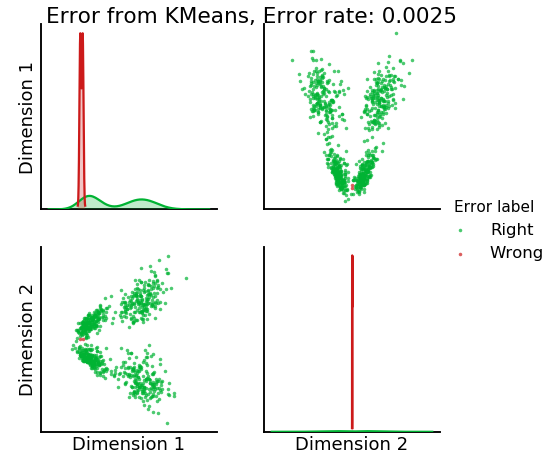

In [80]:
# K-means clustering using ASE
palette_rw = {'Right':(0,0.7,0.2),
           'Wrong':(0.8,0.1,0.1)}
palette_lr = {'Right':(0.7,0.5,0.2),
           'Left':(0.1,0.8,0.5)}
ase_kmeans = KMeans(n_clusters=2).fit_predict(ase_Xhat)
ase_kmeans_labels = (4 * n_verts) * ['Left']
labels_lr = n_verts * [0] + n_verts * [0] + n_verts * [1] + n_verts * [1] #true label
ase_ari = adjusted_rand_score(labels_lr, ase_kmeans)
ase_error = labels_lr - ase_kmeans
ase_error = ase_error != 0
# sometimes the labels given by kmeans will be the inverse of ours
if np.sum(ase_error) / (4 * n_verts) > 0.5:
    ase_error = ase_error == 0
    for i in range(np.size(ase_kmeans)):
        if not ase_kmeans[i]:
            ase_kmeans_labels[i] = 'Right'
else:
    for i in range(np.size(ase_kmeans)):
        if ase_kmeans[i]:
            ase_kmeans_labels[i] = 'Right'

ase_error_rate = np.sum(ase_error) / (4 * n_verts)
ase_error_label = (4 * n_verts) * ['Right']
ase_error_label = np.array(ase_error_label)
ase_error_label[ase_error] = 'Wrong'

pairplot(ase_Xhat,
         labels=ase_kmeans_labels,
         title='KMeans on ASE embedding, ARI: {}'.format(str(ase_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_lr)
pairplot(ase_Xhat,
         labels=ase_error_label,
         title='Error from KMeans, Error rate: {}'.format(str(ase_error_rate)),
         legend_name='Error label',
         height=3.5,
         palette=palette_rw)

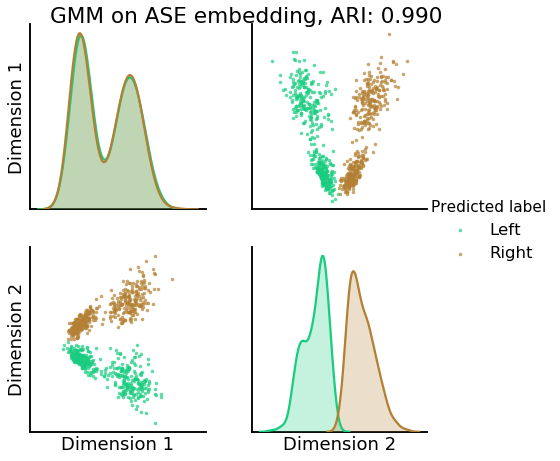

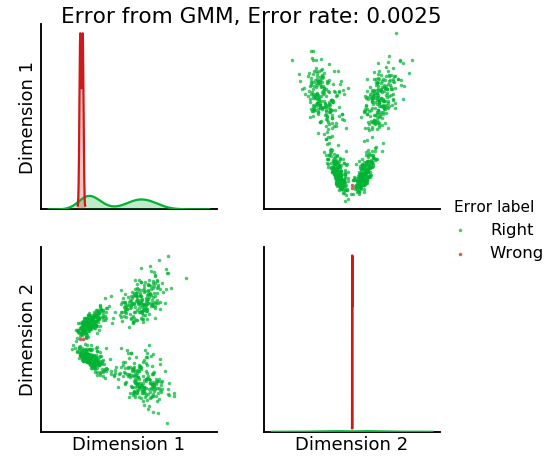

In [81]:
# GMM clustering using ASE
gmm_ase = GaussianMixture(n_components=2).fit(ase_Xhat)
ase_labels = gmm_ase.predict(ase_Xhat)
ase_kmeans_labels = (4 * n_verts) * ['Left']
labels_lr = n_verts * [0] + n_verts * [0] + n_verts * [1] + n_verts * [1] #true label
ase_ari = adjusted_rand_score(labels_lr, ase_kmeans)
ase_error = labels_lr - ase_kmeans
ase_error = ase_error != 0
# sometimes the labels given by kmeans will be the inverse of ours
if np.sum(ase_error) / (4 * n_verts) > 0.5:
    ase_error = ase_error == 0
    for i in range(np.size(ase_kmeans)):
        if not ase_kmeans[i]:
            ase_kmeans_labels[i] = 'Right'
else:
    for i in range(np.size(ase_kmeans)):
        if ase_kmeans[i]:
            ase_kmeans_labels[i] = 'Right'

ase_error_rate = np.sum(ase_error) / (4 * n_verts)
ase_error_label = (4 * n_verts) * ['Right']
ase_error_label = np.array(ase_error_label)
ase_error_label[ase_error] = 'Wrong'

pairplot(ase_Xhat,
         labels=ase_kmeans_labels,
         title='GMM on ASE embedding, ARI: {}'.format(str(ase_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_lr)
pairplot(ase_Xhat,
         labels=ase_error_label,
         title='Error from GMM, Error rate: {}'.format(str(ase_error_rate)),
         legend_name='Error label',
         height=3.5,
         palette=palette_rw)

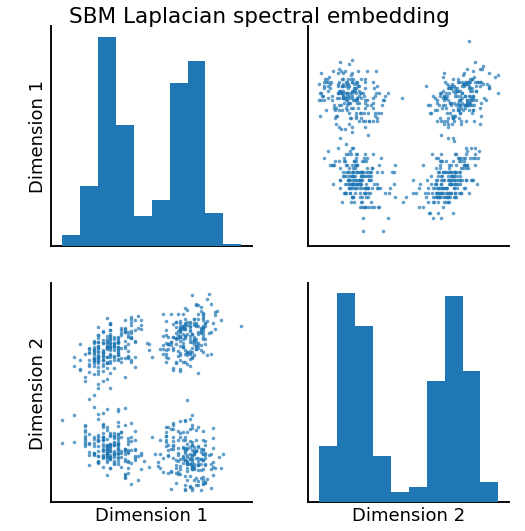

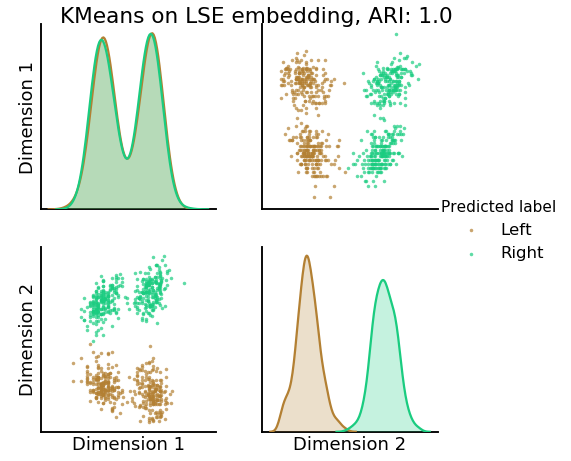

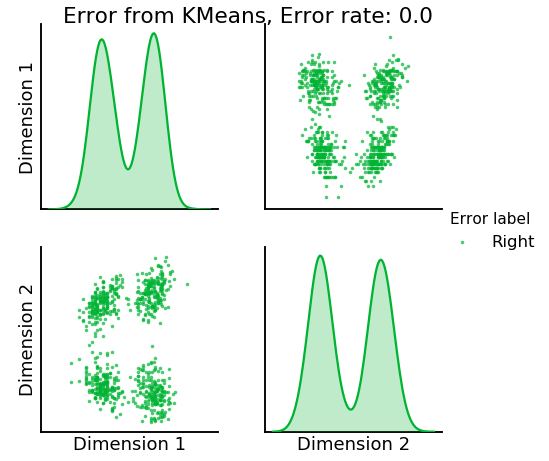

In [82]:
# LSE
lse = LaplacianSpectralEmbed(n_components=None)
lse_Xhat = lse.fit_transform(undirected_sbm)
pairplot(lse_Xhat, title='SBM Laplacian spectral embedding', height=4)
# K-means clustering using LSE
palette_lr = {'Left':(0.7,0.5,0.2),
           'Right':(0.1,0.8,0.5)}
lse_kmeans = KMeans(n_clusters=2).fit_predict(lse_Xhat)
lse_kmeans_labels = (4 * n_verts) * ['Left']
labels_lr = n_verts * [0] + n_verts * [0] + n_verts * [1] + n_verts * [1] #true label
lse_ari = adjusted_rand_score(labels_lr, lse_kmeans)
lse_error = labels_lr - lse_kmeans
lse_error = lse_error != 0
# sometimes the labels given by kmeans will be the inverse of ours
if np.sum(lse_error) / (4 * n_verts) > 0.5:
    lse_error = lse_error == 0
    for i in range(np.size(lse_kmeans)):
        if not lse_kmeans[i]:
            lse_kmeans_labels[i] = 'Right'
else:
    for i in range(np.size(lse_kmeans)):
        if lse_kmeans[i]:
            lse_kmeans_labels[i] = 'Right'

lse_error_rate = np.sum(lse_error) / (4 * n_verts)
lse_error_label = (4 * n_verts) * ['Right']
lse_error_label = np.array(lse_error_label)
lse_error_label[lse_error] = 'Wrong'

pairplot(lse_Xhat,
         labels=lse_kmeans_labels,
         title='KMeans on LSE embedding, ARI: {}'.format(str(lse_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_lr)
pairplot(lse_Xhat,
         labels=lse_error_label,
         title='Error from KMeans, Error rate: {}'.format(str(lse_error_rate)),
         legend_name='Error label',
         height=3.5,
         palette=palette_rw)

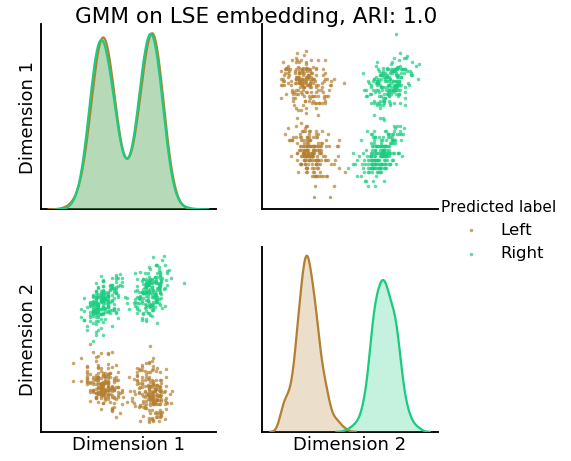

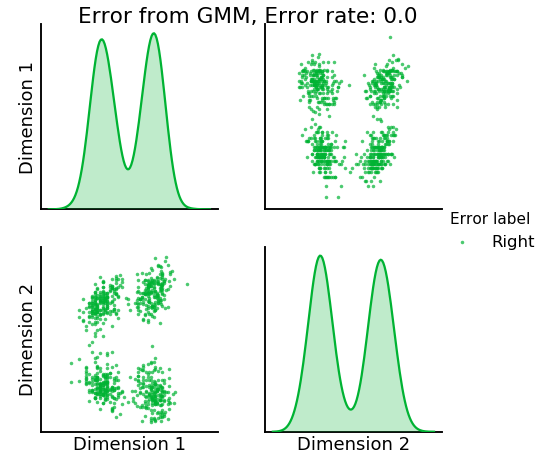

In [83]:
gmm_lse = GaussianMixture(n_components=2).fit(lse_Xhat)
lse_labels = gmm_lse.predict(lse_Xhat)
lse_kmeans_labels = (4 * n_verts) * ['Left']
labels_lr = n_verts * [0] + n_verts * [0] + n_verts * [1] + n_verts * [1] #true label
lse_ari = adjusted_rand_score(labels_lr, lse_kmeans)
lse_error = labels_lr - lse_kmeans
lse_error = lse_error != 0
# sometimes the labels given by kmeans will be the inverse of ours
if np.sum(lse_error) / (4 * n_verts) > 0.5:
    lse_error = lse_error == 0
    for i in range(np.size(lse_kmeans)):
        if not lse_kmeans[i]:
            lse_kmeans_labels[i] = 'Right'
else:
    for i in range(np.size(lse_kmeans)):
        if lse_kmeans[i]:
            lse_kmeans_labels[i] = 'Right'

lse_error_rate = np.sum(lse_error) / (4 * n_verts)
lse_error_label = (4 * n_verts) * ['Right']
lse_error_label = np.array(lse_error_label)
lse_error_label[lse_error] = 'Wrong'

pairplot(lse_Xhat,
         labels=lse_kmeans_labels,
         title='GMM on LSE embedding, ARI: {}'.format(str(lse_ari)[:5]),
         legend_name='Predicted label',
         height=3.5,
         palette= palette_lr)
pairplot(lse_Xhat,
         labels=lse_error_label,
         title='Error from GMM, Error rate: {}'.format(str(lse_error_rate)),
         legend_name='Error label',
         height=3.5,
         palette=palette_rw)